## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# KC House Pricing Project


## EDA

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats

%matplotlib inline

In [3]:
df = pd.read_csv('data/kc_house_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
X = df.drop(['price','waterfront','view','grade','yr_renovated','zipcode', 'long','id','condition','date','sqft_basement'], axis=1)
y = df['price']

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   sqft_above     21597 non-null  int64  
 6   yr_built       21597 non-null  int64  
 7   lat            21597 non-null  float64
 8   sqft_living15  21597 non-null  int64  
 9   sqft_lot15     21597 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.6 MB


In [7]:
model = sm.OLS(endog=y, exog=X).fit()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                          1.449e+04
Date:                Mon, 09 May 2022   Prob (F-statistic):                        0.00
Time:                        13:54:16   Log-Likelihood:                     -2.9777e+05
No. Observations:               21597   AIC:                                  5.956e+05
Df Residuals:                   21587   BIC:                                  5.956e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -6.591e+04   2169.565    -30.380      0.000   -7.02e+04   -6.17e+04
bathrooms      7.898e+04   3748.502     21.071      0.000    7.16e+04    8.63e+04
sqft_living     244.3890      4.877     50.115      0.000     234.830     253.947
sqft_lot          0.0404      0.056      0.724      0.469      -0.069       0.150
floors         5.783e+04   4041.984     14.307      0.000    4.99e+04    6.58e+04
sqft_above        3.0313      4.854      0.624      0.532      -6.483      12.546
yr_built      -3946.3240     64.471    -61.211      0.000   -4072.691   -3819.957
lat            1.597e+05   2608.559     61.239      0.000    1.55e+05    1.65e+05
sqft_living15    92.4623      3.713     24.900      0.000      85.184      99.741
sqft_lot15       -0.6366      0.085     -7.462      0.000      -0.804      -0.469
==============================================================================
Omnibus:                    16263.145   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           848611.858
Skew:                           3.132   Prob(JB):                         0.00
Kurtosis:                      33.063   Cond. No.                     1.42e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
X2 = df.drop(['price','sqft_above', 'sqft_lot', 'waterfront','view','grade'
              ,'yr_renovated','zipcode', 'long','id','condition',
              'date','sqft_basement'], axis=1)
y2 = df['price']

model2 = sm.OLS(endog=y2, exog=X2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                          1.811e+04
Date:                Mon, 09 May 2022   Prob (F-statistic):                        0.00
Time:                        13:54:16   Log-Likelihood:                     -2.9777e+05
No. Observations:               21597   AIC:                                  5.956e+05
Df Residuals:                   21589   BIC:                                  5.956e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -6.596e+04   2168.727    -30.412      0.000   -7.02e+04   -6.17e+04
bathrooms      7.856e+04   3691.235     21.284      0.000    7.13e+04    8.58e+04
sqft_living     246.6221      3.602     68.466      0.000     239.562     253.683
floors         5.892e+04   3610.356     16.319      0.000    5.18e+04     6.6e+04
yr_built      -3938.8014     63.414    -62.113      0.000   -4063.097   -3814.505
lat            1.594e+05   2559.236     62.292      0.000    1.54e+05    1.64e+05
sqft_living15    92.8409      3.626     25.603      0.000      85.733      99.948
sqft_lot15       -0.5896      0.061     -9.735      0.000      -0.708      -0.471
==============================================================================
Omnibus:                    16266.406   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           849604.621
Skew:                           3.133   Prob(JB):                         0.00
Kurtosis:                      33.081   Cond. No.                     7.78e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

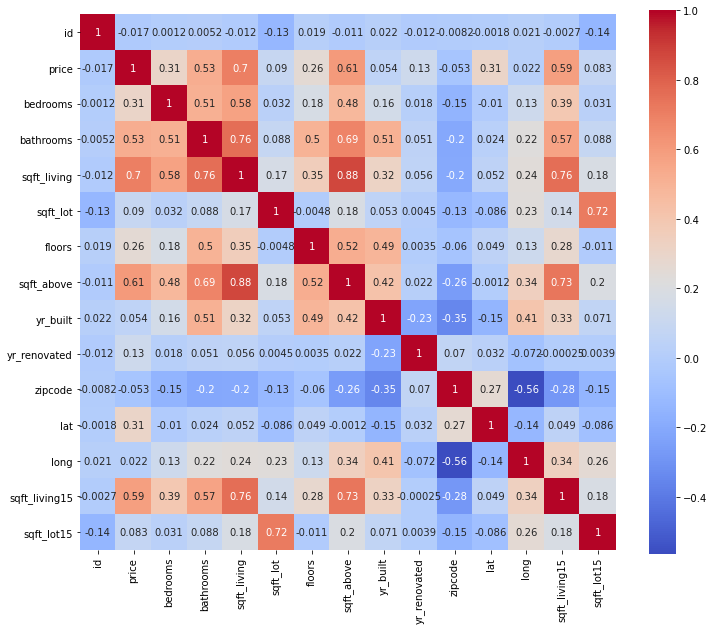

In [10]:
plt.figure(figsize = (12, 10))

sns.heatmap(df.corr(), cmap="coolwarm", annot = True, square = True)

In [11]:
df['sqft_living_per_bedroom'] = df['sqft_living']/df['bedrooms']
df['sqft_living_per_bathroom'] = df['sqft_living']/df['bathrooms']

In [12]:
df['sqft_lot_per_bedroom'] = df['sqft_lot']/df['bedrooms']
df['sqft_lot_per_bathroom'] = df['sqft_lot']/df['bathrooms']
df['sqft_living_percentage'] = df['sqft_living']/df['sqft_lot']

<AxesSubplot:>

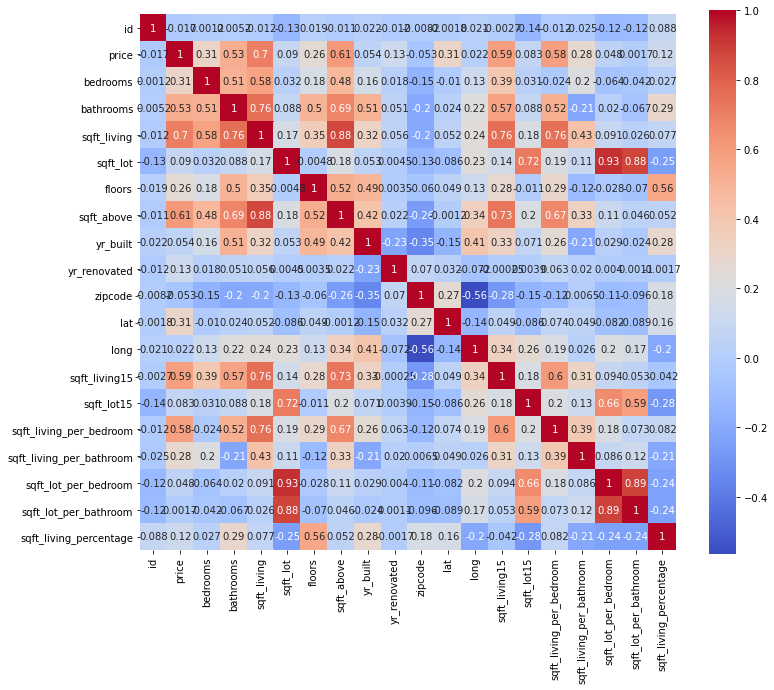

In [13]:
plt.figure(figsize = (12, 10))

sns.heatmap(df.corr(), cmap="coolwarm", annot = True, square = True)

In [14]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

Important Indicators: Renovation yars
After three bedrooms the marginal benefit is slower
Bathrooms are always good. 

## Data Cleaning

In [15]:
# Create a new dataframe using genres listed in my existing data frame. 
grade_df = df['grade'].str.split(' ', expand = True)
#Set the column names
grade_df.rename(columns = {0 : 'numerical_grade'}, inplace = True)
grade_df.drop([1 , 2], axis = 1, inplace = True)
grade_df
# Add the expanded columns back to the original df
# movie_gross_and_director = movie_gross_and_director.merge(genres_df, right_index = True, left_index = True)

,numerical_grade
0,7
1,7
2,6
3,7
4,8
...,...
21592,8
21593,8
21594,7
21595,8


In [16]:
df = df.merge(grade_df, right_index = True, left_index = True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,sqft_living_per_bedroom,sqft_living_per_bathroom,sqft_lot_per_bedroom,sqft_lot_per_bathroom,sqft_living_percentage,numerical_grade
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,47.5112,-122.257,1340,5650,393.333333,1180.000000,1883.333333,5650.000000,0.208850,7
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,47.7210,-122.319,1690,7639,856.666667,1142.222222,2414.000000,3218.666667,0.354874,7
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,47.7379,-122.233,2720,8062,385.000000,770.000000,5000.000000,10000.000000,0.077000,6
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,47.5208,-122.393,1360,5000,490.000000,653.333333,1250.000000,1666.666667,0.392000,7
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,47.6168,-122.045,1800,7503,560.000000,840.000000,2693.333333,4040.000000,0.207921,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,47.6993,-122.346,1530,1509,510.000000,612.000000,377.000000,452.400000,1.352785,8
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,47.5107,-122.362,1830,7200,577.500000,924.000000,1453.250000,2325.200000,0.397385,8
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,47.5944,-122.299,1020,2007,510.000000,1360.000000,675.000000,1800.000000,0.755556,7
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,47.5345,-122.069,1410,1287,533.333333,640.000000,796.000000,955.200000,0.670017,8


In [17]:
df['numerical_grade'] = df['numerical_grade'].astype('int64')

In [18]:
X3 = df.drop(['price','sqft_above', 'sqft_lot', 'waterfront','view','grade'
              ,'yr_renovated','zipcode', 'long','id','condition',
              'date','sqft_basement'], axis=1)
y3 = df['price']

model3 = sm.OLS(endog=y3, exog=X3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                          1.234e+04
Date:                Mon, 09 May 2022   Prob (F-statistic):                        0.00
Time:                        13:54:22   Log-Likelihood:                     -2.9610e+05
No. Observations:               21597   AIC:                                  5.922e+05
Df Residuals:                   21583   BIC:                                  5.923e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
bedrooms                 -8.266e+04   4107.256    -20.125      0.000   -9.07e+04   -7.46e+04
bathrooms                -4.834e+04   7661.946     -6.309      0.000   -6.34e+04   -3.33e+04
sqft_living                337.6345      8.035     42.019      0.000     321.885     353.384
floors                   -4123.0029   3894.078     -1.059      0.290   -1.18e+04    3509.678
yr_built                 -4413.6729     59.339    -74.380      0.000   -4529.982   -4297.363
lat                       1.737e+05   2409.228     72.114      0.000    1.69e+05    1.78e+05
sqft_living15               43.7190      3.627     12.055      0.000      36.610      50.828
sqft_lot15                  -0.4001      0.075     -5.323      0.000      -0.547      -0.253
sqft_living_per_bedroom   -260.1720     21.880    -11.891      0.000    -303.058    -217.286
sqft_living_per_bathroom  -209.5940     13.986    -14.986      0.000    -237.007    -182.181
sqft_lot_per_bedroom         0.0899      0.255      0.352      0.725      -0.410       0.590
sqft_lot_per_bathroom        0.4874      0.147      3.323      0.001       0.200       0.775
sqft_living_percentage    1.265e+05   7411.165     17.071      0.000    1.12e+05    1.41e+05
numerical_grade           1.183e+05   2263.896     52.277      0.000    1.14e+05    1.23e+05
==============================================================================
Omnibus:                    17557.433   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1200733.661
Skew:                           3.443   Prob(JB):                         0.00
Kurtosis:                      38.874   Cond. No.                     2.09e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Last Built Upon Year
    

In [19]:
df["last_built_date"] = df[["yr_built", "yr_renovated"]].max(axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,sqft_living_per_bedroom,sqft_living_per_bathroom,sqft_lot_per_bedroom,sqft_lot_per_bathroom,sqft_living_percentage,numerical_grade,last_built_date
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,-122.257,1340,5650,393.333333,1180.000000,1883.333333,5650.000000,0.208850,7,1955.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,-122.319,1690,7639,856.666667,1142.222222,2414.000000,3218.666667,0.354874,7,1991.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,-122.233,2720,8062,385.000000,770.000000,5000.000000,10000.000000,0.077000,6,1933.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,-122.393,1360,5000,490.000000,653.333333,1250.000000,1666.666667,0.392000,7,1965.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,-122.045,1800,7503,560.000000,840.000000,2693.333333,4040.000000,0.207921,8,1987.0


In [20]:
X4 = df.drop(['price','sqft_above', 'sqft_lot', 'waterfront','view','grade'
              ,'yr_renovated','zipcode', 'id','condition',
              'date','sqft_basement'], axis=1)
y4 = df['price']

model4 = sm.OLS(endog=y4, exog=X4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          1.113e+04
Date:                Mon, 09 May 2022   Prob (F-statistic):                        0.00
Time:                        13:54:22   Log-Likelihood:                     -2.9580e+05
No. Observations:               21597   AIC:                                  5.916e+05
Df Residuals:                   21581   BIC:                                  5.918e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
bedrooms                 -8.076e+04   4052.578    -19.928      0.000   -8.87e+04   -7.28e+04
bathrooms                 -4.83e+04   7567.740     -6.382      0.000   -6.31e+04   -3.35e+04
sqft_living                336.5737      7.928     42.452      0.000     321.034     352.114
floors                   -1.003e+04   3854.190     -2.603      0.009   -1.76e+04   -2477.432
yr_built                 -4329.8728    133.254    -32.493      0.000   -4591.061   -4068.685
lat                       4.251e+05   1.06e+04     40.155      0.000    4.04e+05    4.46e+05
long                      1.052e+05   4298.331     24.480      0.000    9.68e+04    1.14e+05
sqft_living15               34.3200      3.602      9.529      0.000      27.261      41.379
sqft_lot15                  -0.4457      0.074     -6.008      0.000      -0.591      -0.300
sqft_living_per_bedroom   -260.6130     21.595    -12.068      0.000    -302.941    -218.286
sqft_living_per_bathroom  -197.1940     13.805    -14.284      0.000    -224.254    -170.134
sqft_lot_per_bedroom         0.0308      0.252      0.122      0.903      -0.462       0.524
sqft_lot_per_bathroom        0.5414      0.145      3.741      0.000       0.258       0.825
sqft_living_percentage    1.137e+05   7329.253     15.516      0.000    9.94e+04    1.28e+05
numerical_grade           1.128e+05   2245.227     50.242      0.000    1.08e+05    1.17e+05
last_built_date            404.1032    137.462      2.940      0.003     134.668     673.538
==============================================================================
Omnibus:                    18394.603   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1394020.514
Skew:                           3.682   Prob(JB):                         0.00
Kurtosis:                      41.664   Cond. No.                     2.94e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

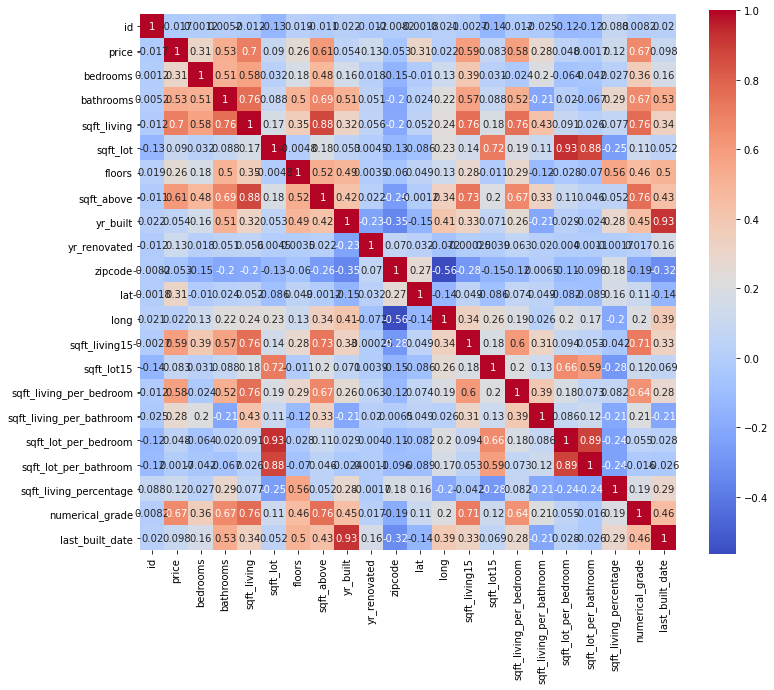

In [21]:
plt.figure(figsize = (12, 10))

sns.heatmap(df.corr(), cmap="coolwarm", annot = True, square = True)

#### School Data
https://www.schooldigger.com/go/WA/county/King+County/search.aspx

### Using One Hot Encoder for Waterfront Category

In [22]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,sqft_living_per_bedroom,sqft_living_per_bathroom,sqft_lot_per_bedroom,sqft_lot_per_bathroom,sqft_living_percentage,numerical_grade,last_built_date
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,-122.257,1340,5650,393.333333,1180.000000,1883.333333,5650.000000,0.208850,7,1955.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,-122.319,1690,7639,856.666667,1142.222222,2414.000000,3218.666667,0.354874,7,1991.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,-122.233,2720,8062,385.000000,770.000000,5000.000000,10000.000000,0.077000,6,1933.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,-122.393,1360,5000,490.000000,653.333333,1250.000000,1666.666667,0.392000,7,1965.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,-122.045,1800,7503,560.000000,840.000000,2693.333333,4040.000000,0.207921,8,1987.0


In [23]:
df['waterfront'].fillna('NO', inplace=True)
df['yr_renovated'].fillna(0.0, inplace=True)
df['view'].fillna('NONE', inplace = True)

In [24]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df[['waterfront']]).toarray())
enc_df

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
21592,1.0,0.0
21593,1.0,0.0
21594,1.0,0.0
21595,1.0,0.0


In [25]:
# merge with main df bridge_df on key values
df = df.merge(enc_df, right_index = True, left_index = True)

In [26]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,sqft_living_per_bedroom,sqft_living_per_bathroom,sqft_lot_per_bedroom,sqft_lot_per_bathroom,sqft_living_percentage,numerical_grade,last_built_date,0,1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,5650,393.333333,1180.000000,1883.333333,5650.000000,0.208850,7,1955.0,1.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7639,856.666667,1142.222222,2414.000000,3218.666667,0.354874,7,1991.0,1.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,8062,385.000000,770.000000,5000.000000,10000.000000,0.077000,6,1933.0,1.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,5000,490.000000,653.333333,1250.000000,1666.666667,0.392000,7,1965.0,1.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,7503,560.000000,840.000000,2693.333333,4040.000000,0.207921,8,1987.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1509,510.000000,612.000000,377.000000,452.400000,1.352785,8,2009.0,1.0,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,7200,577.500000,924.000000,1453.250000,2325.200000,0.397385,8,2014.0,1.0,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,2007,510.000000,1360.000000,675.000000,1800.000000,0.755556,7,2009.0,1.0,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,1287,533.333333,640.000000,796.000000,955.200000,0.670017,8,2004.0,1.0,0.0


In [27]:
df.rename(columns={"1_x": "Waterfront"}, inplace = True)

In [28]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,sqft_living_per_bedroom,sqft_living_per_bathroom,sqft_lot_per_bedroom,sqft_lot_per_bathroom,sqft_living_percentage,numerical_grade,last_built_date,0,1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,5650,393.333333,1180.000000,1883.333333,5650.000000,0.208850,7,1955.0,1.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7639,856.666667,1142.222222,2414.000000,3218.666667,0.354874,7,1991.0,1.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,8062,385.000000,770.000000,5000.000000,10000.000000,0.077000,6,1933.0,1.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,5000,490.000000,653.333333,1250.000000,1666.666667,0.392000,7,1965.0,1.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,7503,560.000000,840.000000,2693.333333,4040.000000,0.207921,8,1987.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1509,510.000000,612.000000,377.000000,452.400000,1.352785,8,2009.0,1.0,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,7200,577.500000,924.000000,1453.250000,2325.200000,0.397385,8,2014.0,1.0,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,2007,510.000000,1360.000000,675.000000,1800.000000,0.755556,7,2009.0,1.0,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,1287,533.333333,640.000000,796.000000,955.200000,0.670017,8,2004.0,1.0,0.0


In [29]:
X5 = df.drop(['price','sqft_above', 'sqft_lot', 'waterfront','view','grade'
              ,'yr_renovated','zipcode', 'id','condition',
              'date','sqft_basement'], axis=1)
y5 = df['price']

model5 = sm.OLS(endog=y5, exog=X5).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2898.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        13:54:27   Log-Likelihood:            -2.9455e+05
No. Observations:               21597   AIC:                         5.891e+05
Df Residuals:                   21579   BIC:                         5.893e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
bedrooms                 -8.018e+04   3827.106    -20.950      0.000   -8.77e+04   -7.27e+04
bathrooms                -4.922e+04   7145.390     -6.888      0.000   -6.32e+04   -3.52e+04
sqft_living                337.8849      7.485     45.144      0.000     323.214     352.555
floors                   -9616.4070   3644.709     -2.638      0.008   -1.68e+04   -2472.508
yr_built                 -3563.0279    128.192    -27.795      0.000   -3814.293   -3311.763
lat                       5.141e+05   1.06e+04     48.655      0.000    4.93e+05    5.35e+05
long                     -1.027e+05   1.21e+04     -8.508      0.000   -1.26e+05    -7.9e+04
sqft_living15               44.0088      3.441     12.790      0.000      37.264      50.753
sqft_lot15                  -0.3608      0.070     -5.141      0.000      -0.498      -0.223
sqft_living_per_bedroom   -308.5985     20.420    -15.113      0.000    -348.622    -268.575
sqft_living_per_bathroom  -187.7485     13.034    -14.404      0.000    -213.297    -162.200
sqft_lot_per_bedroom         0.2396      0.238      1.009      0.313      -0.226       0.705
sqft_lot_per_bathroom        0.5334      0.137      3.903      0.000       0.266       0.801
sqft_living_percentage    8.393e+04   7244.538     11.585      0.000    6.97e+04    9.81e+04
numerical_grade           1.041e+05   2152.464     48.354      0.000    9.99e+04    1.08e+05
last_built_date            479.6635    130.203      3.684      0.000     224.457     734.870
0                        -3.123e+07   1.62e+06    -19.333      0.000   -3.44e+07   -2.81e+07
1                        -3.043e+07   1.62e+06    -18.828      0.000   -3.36e+07   -2.73e+07
==============================================================================
Omnibus:                    16912.162   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1187538.632
Skew:                           3.228   Prob(JB):                         0.00
Kurtosis:                      38.749   Cond. No.                     6.24e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,sqft_living_per_bedroom,sqft_living_per_bathroom,sqft_lot_per_bedroom,sqft_lot_per_bathroom,sqft_living_percentage,numerical_grade,last_built_date,0,1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,5650,393.333333,1180.000000,1883.333333,5650.000000,0.208850,7,1955.0,1.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7639,856.666667,1142.222222,2414.000000,3218.666667,0.354874,7,1991.0,1.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,8062,385.000000,770.000000,5000.000000,10000.000000,0.077000,6,1933.0,1.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,5000,490.000000,653.333333,1250.000000,1666.666667,0.392000,7,1965.0,1.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,7503,560.000000,840.000000,2693.333333,4040.000000,0.207921,8,1987.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1509,510.000000,612.000000,377.000000,452.400000,1.352785,8,2009.0,1.0,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,7200,577.500000,924.000000,1453.250000,2325.200000,0.397385,8,2014.0,1.0,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,2007,510.000000,1360.000000,675.000000,1800.000000,0.755556,7,2009.0,1.0,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,1287,533.333333,640.000000,796.000000,955.200000,0.670017,8,2004.0,1.0,0.0
